### Combining gates along a single wire

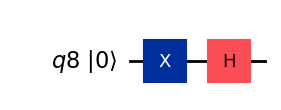

In [13]:
from qiskit import QuantumRegister, QuantumCircuit
reg = QuantumRegister(1)
circuit = QuantumCircuit(reg)
circuit.x(reg[0])
circuit.h(reg[0])

#circuit.x(reg[0])

#circuit.h(reg[0])
#circuit.h(reg[0])

display(circuit.draw('mpl', initial_state=True))

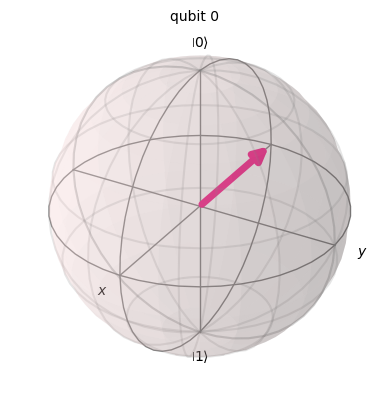

In [14]:
from qiskit.quantum_info import Statevector
from qiskit.visualization \
    import plot_bloch_multivector 

vector = Statevector(circuit)  
display(plot_bloch_multivector(vector.data))

In [19]:
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

device = Aer.get_backend('qasm_simulator')
#from qiskit_ibm_provider import IBMProvider
#provider = IBMProvider()
#device = provider.get_backend('ibmq_lima')

circuit.measure_all()
qc_transpiled = transpile(circuit, backend=device)
job = device.run(qc_transpiled)

result = job.result()
counts = result.get_counts(circuit)
print(counts)


{'1': 527, '0': 497}


### Experimenting with rotations

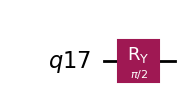

In [20]:
from qiskit import QuantumRegister, QuantumCircuit
from math import pi
reg = QuantumRegister(1)
circuit = QuantumCircuit(reg)
circuit.ry(pi/2, reg[0])
#circuit.ry(pi/3, reg[0])
display(circuit.draw('mpl'))

In [23]:
from qiskit_aer import Aer
from qiskit.compiler import transpile
device = Aer.get_backend('qasm_simulator')

circuit.measure_all()

qc_transpiled = transpile(circuit, backend=device)
job = device.run(qc_transpiled)

result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1 1 1': 511, '0 0 0': 513}
